In [14]:
pip install psycopg2-binary

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2

In [16]:
conn_string = "host='localhost' dbname='FoodOrdrs_Database' user='postgres' password='44@Smaji'"
conn = psycopg2.connect(conn_string)

In [17]:
def fetch_data(query):
    return pd.read_sql_query(query, conn)


### Get the total successful and faild orders

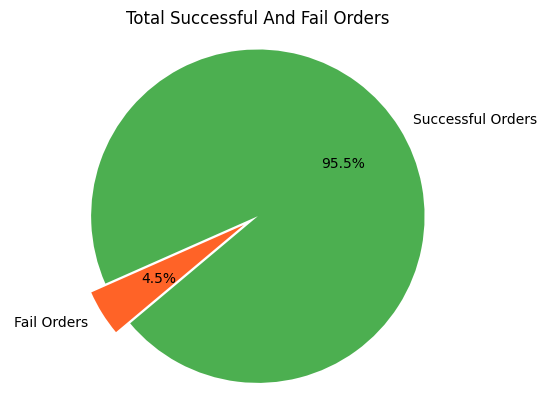

In [18]:
query = """
SELECT SUM(successful_orders) AS total_successful,
SUM(fail_orders) AS total_faild
FROM restaurant_orders;
        """
data = fetch_data(query)
labels = ['Successful Orders', 'Fail Orders']
colors = ['#4CAF50', '#FF6327']
sizes = [data['total_successful'][0],data['total_faild'][0]]
explode = (0,0.1)
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%',explode =explode,startangle =220 )
plt.axis('equal')
plt.title('Total Successful And Fail Orders')
plt.show()

# Get the Number Of Restaurents Per Specialization

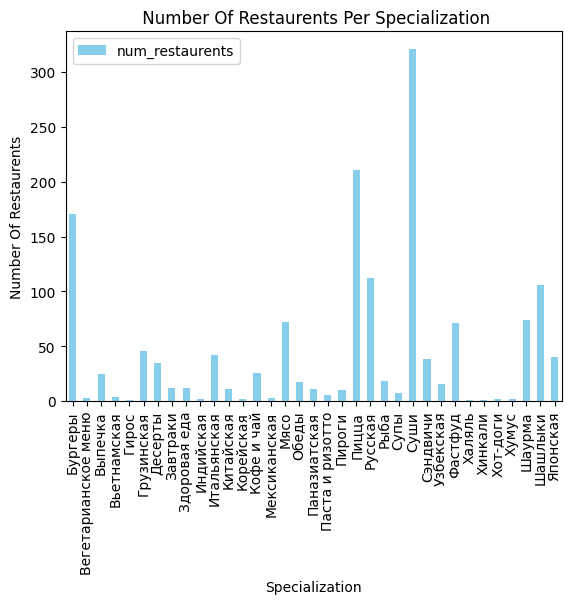

In [19]:
query = """
SELECT spec, COUNT(DISTINCT(vendor_id))AS num_restaurents
FROM restaurant_orders
GROUP BY spec;
"""

data = fetch_data(query)
data.plot(kind='bar', x='spec', y='num_restaurents', color ='skyblue')
plt.xlabel('Specialization')
plt.ylabel('Number Of Restaurents')
plt.title(' Number Of Restaurents Per Specialization')
plt.xticks(rotation = 90)
plt.tight_layout
plt.show()

# Get the total Number of Successful Orders and Faild Ordes per city

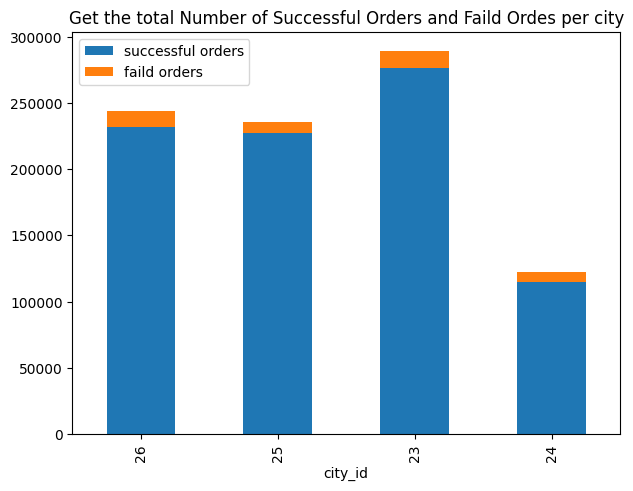

In [20]:
query = """
SELECT city_id, 
SUM(successful_orders) AS total_successful,
SUM (fail_orders) AS total_faild
FROM restaurant_orders
GROUP BY city_id;
"""
data = fetch_data(query)
data.plot(kind= 'bar', x= 'city_id', y=['total_successful', 'total_faild'], stacked = True )
plt.legend (['successful orders', 'faild orders'])
plt.tight_layout()
plt.title('Get the total Number of Successful Orders and Faild Ordes per city')
plt.show()

# Get the average orders per day

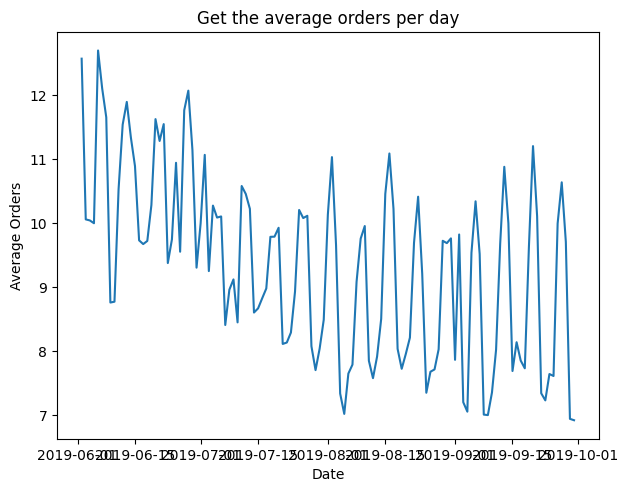

In [21]:
query = """
SELECT date,
AVG(successful_orders+fail_orders) AS avg_orders
FROM restaurant_orders
GROUP BY date
ORDER BY date;
"""

data = fetch_data(query)
data.plot(kind= 'line', x= 'date', y= 'avg_orders', legend = False, stacked = True )
plt.xlabel('Date')
plt.ylabel ('Average Orders')
plt.tight_layout()
plt.title('Get the average orders per day')
plt.show()

# Get the top 4 cities by Total Orders

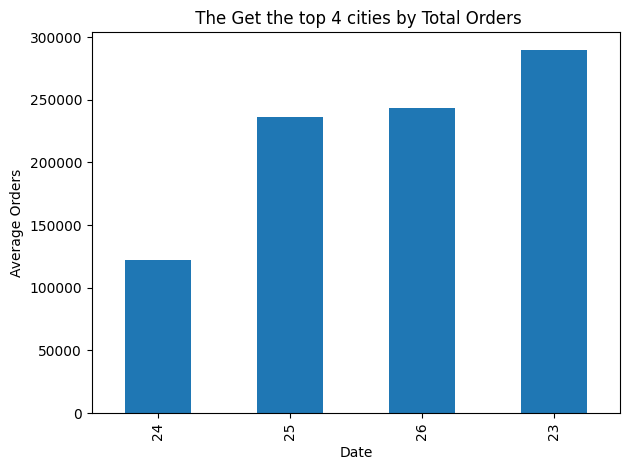

In [22]:
query = """
SELECT city_id,
SUM(successful_orders + fail_orders) AS total_orders
FROM  restaurant_orders
GROUP BY city_id
ORDER BY total_orders
LIMIT 4;
"""

data = fetch_data(query)
data.plot(kind= 'bar', x='city_id', y='total_orders', legend = False )
plt.xlabel ('Date')
plt.ylabel ('Average Orders')
plt.title(' The Get the top 4 cities by Total Orders')
plt.tight_layout()
plt.show()

# Success rate by specilization

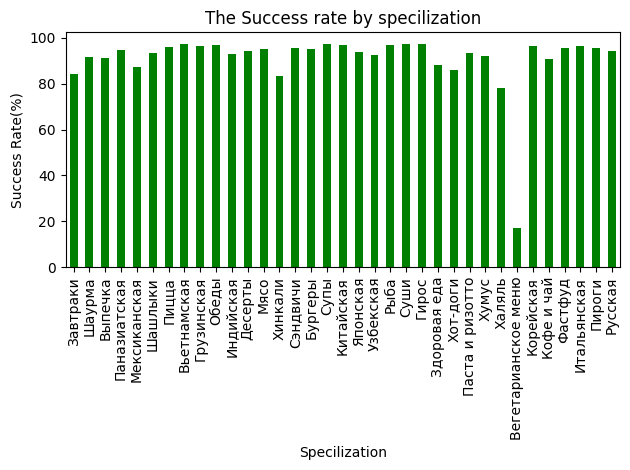

In [23]:
query = """
SELECT spec,
SUM(successful_orders) AS total_successful,
SUM(fail_orders) AS total_faild,
(SUM(successful_orders) * 100 / (SUM(successful_orders) + SUM(fail_orders))) as success_rate
from restaurant_orders
GROUP BY spec;

"""
data = fetch_data(query)
data.plot(kind= 'bar', x='spec', y='success_rate', legend = False, color = 'green' )
plt.xlabel ('Specilization')
plt.ylabel ('Success Rate(%)')
plt.title('The Success rate by specilization')
plt.tight_layout()
plt.xticks(rotation =90)
plt.show()

# Monthly orders trends

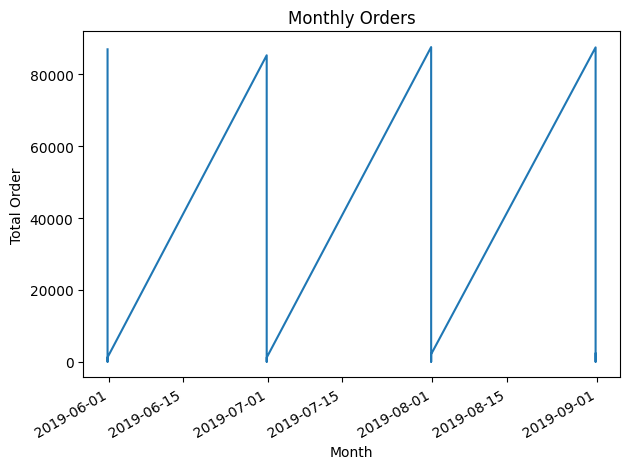

In [24]:
query = """
SELECT date_trunc ('month', date)
AS month, spec,
SUM (successful_orders) AS total_successful,
SUM(fail_orders) AS total_failed,
(SUM(successful_orders) * 100 / (SUM(successful_orders) + SUM(fail_orders))) AS success_rate
FROM restaurant_orders
GROUP BY month, spec
ORDER BY month, spec;
"""

data = fetch_data(query)
data.plot(kind= 'line', x='month', y='total_successful', legend = False,  )
plt.xlabel ('Month')
plt.ylabel ('Total Order')
plt.title('Monthly Orders')
plt.tight_layout()
plt.show()